In [1]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('creditcard.csv')  # Ensure the dataset is in your working directory

# Basic exploration
print("Shape of dataset:", data.shape)
print("Class distribution:\n", data['Class'].value_counts())


Shape of dataset: (284807, 31)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize 'Amount' feature
data['NormalizedAmount'] = StandardScaler().fit_transform(data[['Amount']])

# Drop original 'Amount' and 'Time' columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)


In [4]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled dataset shape:", np.bincount(y_resampled))


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Resampled dataset shape: [284315 284315]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     56863
           1     0.9997    1.0000    0.9999     56863

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



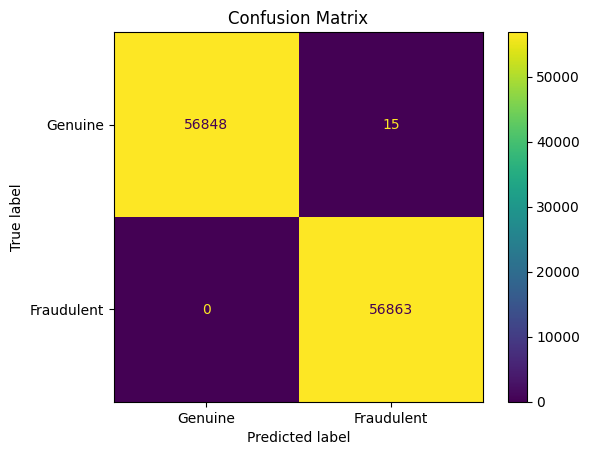

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Genuine", "Fraudulent"]).plot()
plt.title("Confusion Matrix")
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr, digits=4))


Logistic Regression Report:
               precision    recall  f1-score   support

           0     0.9226    0.9743    0.9477     56863
           1     0.9727    0.9182    0.9447     56863

    accuracy                         0.9462    113726
   macro avg     0.9477    0.9462    0.9462    113726
weighted avg     0.9477    0.9462    0.9462    113726



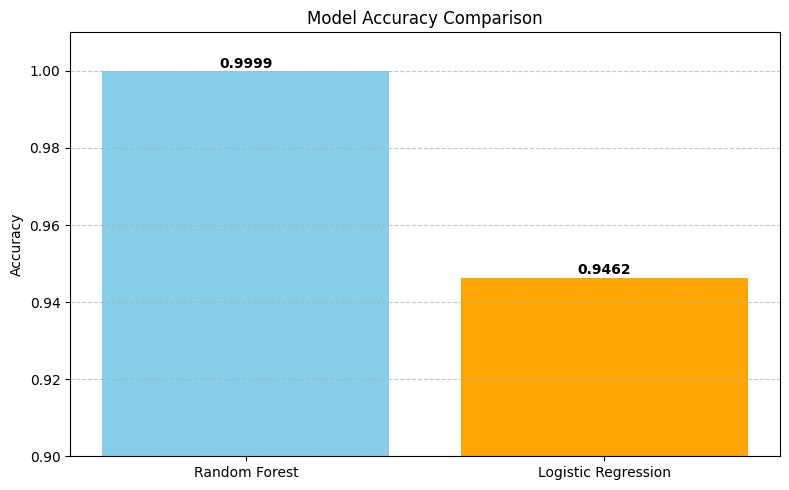

In [9]:
import matplotlib.pyplot as plt

# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracies = {
    "Random Forest": accuracy_score(y_test, rf_model.predict(X_test)),
    "Logistic Regression": accuracy_score(y_test, lr_model.predict(X_test))
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
